In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [3]:
#read dataset
path = r'D:\Python\Automated_driving'
all_files = glob.glob(path + '/*.csv')

In [4]:
#store dataset into a new list and concatenate
df =[pd.read_csv(filename, index_col=None, header=0) for filename in all_files]

df =pd.concat(df, axis=0,  ignore_index=True )
df.head()

,Manufacturer,Permit Number,DATE,VIN NUMBER,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No),DRIVER PRESENT\n(Yes or No),"DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)","DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)",DESCRIPTION OF FACTS CAUSING DISENGAGEMENT,Unnamed: 9,Unnamed: 10
0,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,No,Yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN
1,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,No,Yes,test driver,street,Unexpected result from the radar based percept...,NaN,NaN
2,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,No,Yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN
3,Ambarella Corp.,AVT053,3/14/2018,3LN6L5MU7HR609845,No,Yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN
4,Ambarella Corp.,AVT053,3/15/2018,3LN6L5MU7HR609845,No,Yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9339 entries, 0 to 9338
Data columns (total 11 columns):
 #   Column                                                                                          Non-Null Count  Dtype 
---  ------                                                                                          --------------  ----- 
 0   Manufacturer                                                                                    9339 non-null   object
 1   Permit Number                                                                                   9339 non-null   object
 2   DATE                                                                                            9338 non-null   object
 3   VIN NUMBER                                                                                      9338 non-null   object
 4   VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER
(Yes or No)                                    9338 non-null   object
 5   DRIVER PRESENT
(Yes 

In [6]:
#count sum of null values
df.isnull().sum()

Manufacturer                                                                                           0
Permit Number                                                                                          0
DATE                                                                                                   1
VIN NUMBER                                                                                             1
VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No)                                          1
DRIVER PRESENT\n(Yes or No)                                                                            1
DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)                    1
DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)       1
DESCRIPTION OF FACTS CAUSING DISENGAGEMENT                                                             1
Unnamed: 9                                             

In [7]:
#unique entries in unnamed : 9 column
df['Unnamed: 9'].unique()

array([nan, ' On city road in light traffic with clear sky during dusk',
       ' On city road in heavy traffic with cloudy sky during day',
       ' On city road in heavy traffic with clear sky during day',
       ' On city road in light traffic with light rain during day',
       ' Prediction discrepancy',
       ' On city road in moderate traffic with clear sky during day',
       ' On city road in moderate traffic with clear sky during night',
       ' On city road in heavy traffic with clear sky during dusk',
       ' On city road in moderate traffic with light rain during day',
       ' On city road in moderate traffic with cloudy sky during night',
       ' On city road in heavy traffic with clear sky during night',
       ' On city road in heavy traffic with cloudy sky during dusk'],
      dtype=object)

In [8]:
#display non  null values in unnamed : 9 column
df[df['Unnamed: 9'].notnull()].head()

,Manufacturer,Permit Number,DATE,VIN NUMBER,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No),DRIVER PRESENT\n(Yes or No),"DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)","DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)",DESCRIPTION OF FACTS CAUSING DISENGAGEMENT,Unnamed: 9,Unnamed: 10
232,Gatik AI Inc.,AVT054,10/11/2018,52CG2DGA7J0017503,No,Yes,Test Driver,Street,Perception discrepancy,On city road in light traffic with clear sky ...,NaN
233,Gatik AI Inc.,AVT054,10/22/2018,52CG2DGA7J0017503,No,Yes,Test Driver,Street,Perception discrepancy,On city road in heavy traffic with cloudy sky...,NaN
234,Gatik AI Inc.,AVT054,11/06/2018,52CG2DGA7J0017503,No,Yes,AV System,Street,Hardware discrepancy or system fault,On city road in heavy traffic with clear sky ...,NaN
235,Gatik AI Inc.,AVT054,11/29/2018,52CG2DGA7J0017503,No,Yes,Test Driver,Street,Perception discrepancy,On city road in light traffic with light rain...,NaN
236,Gatik AI Inc.,AVT054,12/15/2018,52CG2DGA7J0017503,No,Yes,Test Driver,Street,Motion/Behaviour planning discrepancy,On city road in heavy traffic with clear sky ...,NaN


In [9]:
#drop columns unnamed 9 amd 10
df.drop(['Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)

In [10]:
df.columns

Index(['Manufacturer', 'Permit Number', 'DATE', 'VIN NUMBER',
       'VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No)',
       'DRIVER PRESENT\n(Yes or No)',
       'DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)',
       'DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)',
       'DESCRIPTION OF FACTS CAUSING DISENGAGEMENT'],
      dtype='object')

In [11]:
#setting column names, changes reflect in dataframe in order
df.columns = ['Manufacturer', 'Permit number', 'Date', 'VIN number', 'Driverless capability', 'Driver presence',
               'Disengagement initiated by', 'Disengagement location', 'Disengagement causes']


In [12]:
df.columns

Index(['Manufacturer', 'Permit number', 'Date', 'VIN number',
       'Driverless capability', 'Driver presence',
       'Disengagement initiated by', 'Disengagement location',
       'Disengagement causes'],
      dtype='object')

In [13]:
#display unique entries in Disengagement location column
df['Disengagement location'].unique()

array(['street', 'street (high speed)', 'Street', ' Downtown street',
       'Freeway', 'highway', 'Highway', 'Rural Road', 'Rural',
       'Parking Facility', nan, 'parking facility', 'STREET',
       'Parking Lot'], dtype=object)

In [14]:
#renaming in Diengagament location column
 

In [15]:
#replace similar names in Disengagaement column to a one catagory
df['Disengagement location'].replace(['street', 'street (high speed)', 'Street', 'STREET', 'Downtown street', ' Downtown street'], 'street', inplace=True)
df['Disengagement location'].replace(['Parking Facility', 'parking facility', 'Parking Lot'], 'parking', inplace=True)
df['Disengagement location'].replace('Highway', 'highway', inplace=True)
df['Disengagement location'].replace(['Rural', 'Rural Road'], 'rural road', inplace=True)


In [16]:
#reflect changes from preivous command
df['Disengagement location'].unique()

array(['street', 'Freeway', 'highway', 'rural road', 'parking', nan],
      dtype=object)

In [17]:
#display unique entries in Type of Disengagement column
#
df['Disengagement initiated by'].unique()

array(['test driver', 'Test Driver', 'AV System', 'Safety Driver',
       'Vehicle Operator', 'Test driver', nan], dtype=object)

In [18]:
#replace similar names in Type of Disengagement to a one catagory
df['Disengagement initiated by'].replace(['Test Driver', 'test driver', 'Test driver', 'Safety Driver', 'Vehicle Operator'], 'Driver', inplace= True)
df['Disengagement initiated by'].replace(['AV System'], 'Vehicle', inplace= True)
df['Disengagement initiated by'].unique()

array(['Driver', 'Vehicle', nan], dtype=object)

In [19]:
#display number of empty cells, data type and columns name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9339 entries, 0 to 9338
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Manufacturer                9339 non-null   object
 1   Permit number               9339 non-null   object
 2   Date                        9338 non-null   object
 3   VIN number                  9338 non-null   object
 4   Driverless capability       9338 non-null   object
 5   Driver presence             9338 non-null   object
 6   Disengagement initiated by  9338 non-null   object
 7   Disengagement location      9338 non-null   object
 8   Disengagement causes        9338 non-null   object
dtypes: object(9)
memory usage: 656.8+ KB


In [20]:
#display cell with null date value
df[df['Date'].isnull()]

,Manufacturer,Permit number,Date,VIN number,Driverless capability,Driver presence,Disengagement initiated by,Disengagement location,Disengagement causes
5664,"Tesla, Inc.",AVT005,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#drop date cell with null value
df.dropna(subset=['Date'], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9338 entries, 0 to 9338
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Manufacturer                9338 non-null   object
 1   Permit number               9338 non-null   object
 2   Date                        9338 non-null   object
 3   VIN number                  9338 non-null   object
 4   Driverless capability       9338 non-null   object
 5   Driver presence             9338 non-null   object
 6   Disengagement initiated by  9338 non-null   object
 7   Disengagement location      9338 non-null   object
 8   Disengagement causes        9338 non-null   object
dtypes: object(9)
memory usage: 729.5+ KB


In [23]:
df['Driver presence'].unique()

array(['Yes', 'YES', 'yes', 'Y'], dtype=object)

In [24]:
#make data consistent
df['Driver presence'].replace(['yes', 'YES', 'Y'], 'Yes', inplace=True)

In [25]:
#display unique values in Driverless capability ']
df['Driverless capability'].unique()

array(['No', 'Yes', 'NO', 'no', 'N'], dtype=object)

In [26]:
#make data consistent
df['Driverless capability'].replace(['NO', 'no', 'N'], 'No', inplace=True)

In [27]:
df['Driverless capability'].unique()

array(['No', 'Yes'], dtype=object)

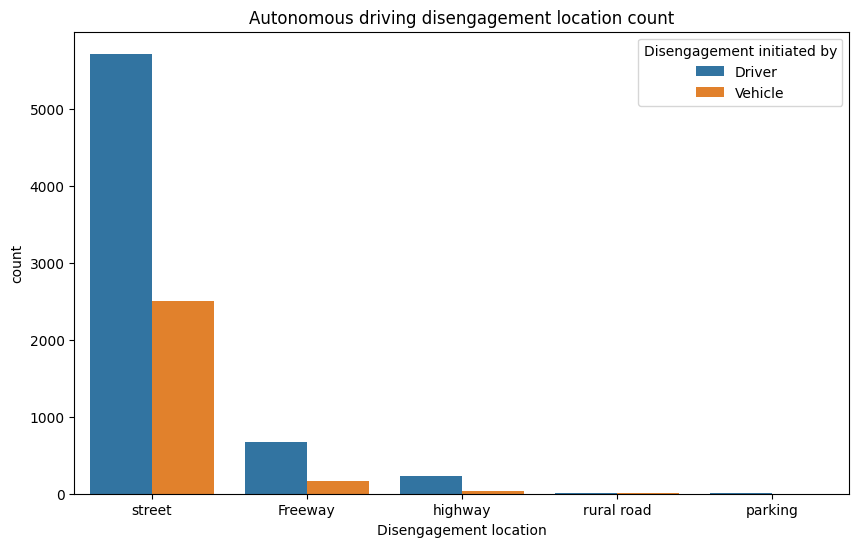

In [28]:
#visualize data
plt.figure(figsize=(10,6))
sns.countplot(x='Disengagement location', data=df, hue='Disengagement initiated by')
plt.title('Autonomous driving disengagement location count')
plt.show()


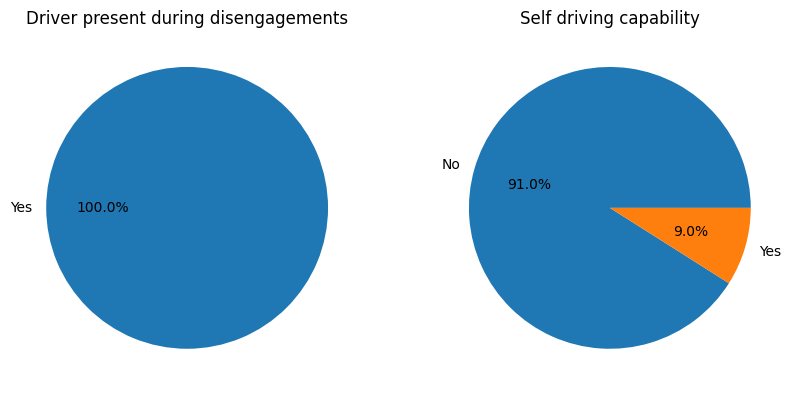

In [42]:
#visualize the self-driving capacbility of cars and driver presence in that sceanrio in pie chart
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
Driver_presence = df['Driver presence'].value_counts().tolist()
labelling = df['Driver presence'].unique().tolist()
plt.pie(Driver_presence, autopct='%1.1f%%', labels=labelling)
labelling = df['Driver presence'].unique().tolist()
plt.title('Driver present during disengagements')


selfdriving_capability = df['Driverless capability'].value_counts().tolist()
labelling1= df['Driverless capability'].unique().tolist()
plt.subplot(1,2,2)
plt.pie(selfdriving_capability, autopct='%1.1f%%', labels = labelling1)
plt.title('Self driving capability')

plt.show()


In [ ]:
#desribe manufacturer column
df['Manufacturer'].describe()

count     9338                     
unique    35                       
top       Toyota Research Institute
freq      2947                     
Name: Manufacturer, dtype: object

In [ ]:
#display full text of top 10 most common disengagement reason

df['Disengagement causes'].shape

(9338,)

In [43]:
#display duplicates in Disengagement causes column
df['Disengagement causes'].duplicated().sum()

8766

In [ ]:
#drop duplicates in disengagement causes column
df.drop_duplicates(subset=['Disengagement causes'], inplace=True)

In [ ]:
df['Disengagement causes'].shape

(572,)

In [36]:
df3 = df['Disengagement causes'].value_counts().head(10)
df3

Disengagement causes
Safety Driver proactive disengagement.                                                                                                                                                                                                                  1780
Disengage for unwanted maneuver of the vehicle caused by a planning discrepancy while generating an appropriate trajectory                                                                                                                               805
Automatic disengagement caused by planner fault.                                                                                                                                                                                                         742
Disengage due to operator discomfort                                                                                                                                                                                        

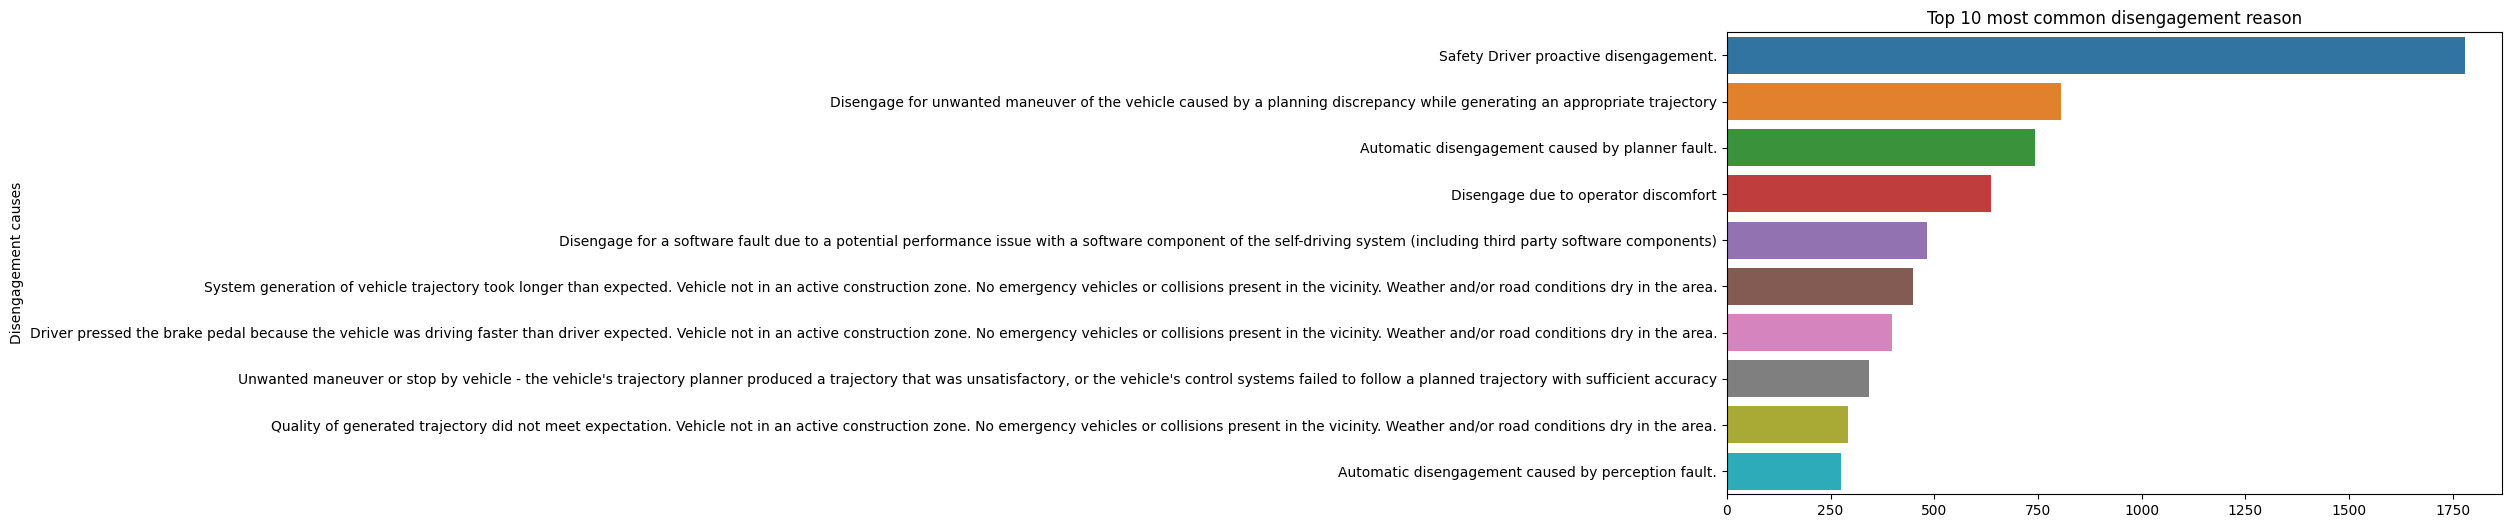

In [41]:
#visualize df3
plt.figure(figsize=(10,6))
sns.barplot(y=df3.index, x=df3.values)

plt.title('Top 10 most common disengagement reason')
plt.show()
